In [1]:
import pandas_ml as pdml

import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### Download California housing dataset
Source: https://www.kaggle.com/harlfoxem/housesalesprediction

This contains details of house sales in Kings County, WA, USA. Data is from 2014-15

In [2]:
house_data = pd.read_csv('datasets/house_data.csv' )

In [3]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
house_data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
x_data = house_data[['sqft_living', 
                     'bedrooms', 
                     'bathrooms', 
                     'yr_built', 
                     'yr_renovated', 
                     'grade', 
                     'waterfront', 
                     'view']]

y_data = house_data ['price']

In [7]:
x_data.head()

,sqft_living,bedrooms,bathrooms,yr_built,yr_renovated,grade,waterfront,view
0,1180,3,1.00,1955,0,7,0,0
1,2570,3,2.25,1951,1991,7,0,0
2,770,2,1.00,1933,0,6,0,0
3,1960,4,3.00,1965,0,7,0,0
4,1680,3,2.00,1987,0,8,0,0


In [8]:
ohe_zipcode = pd.get_dummies(house_data['zipcode'])

ohe_zipcode.head()

,98001,98002,98003,98004,98005,98006,98007,98008,98010,98011,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data = pd.concat([x_data, ohe_zipcode, y_data], 
                 axis=1)

data.head()

,sqft_living,bedrooms,bathrooms,yr_built,yr_renovated,grade,waterfront,view,98001,98002,...,98148,98155,98166,98168,98177,98178,98188,98198,98199,price
0,1180,3,1.00,1955,0,7,0,0,0,0,...,0,0,0,0,0,1,0,0,0,221900.0
1,2570,3,2.25,1951,1991,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,538000.0
2,770,2,1.00,1933,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,180000.0
3,1960,4,3.00,1965,0,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,604000.0
4,1680,3,2.00,1987,0,8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,510000.0


In [10]:
mf = pdml.ModelFrame(data.to_dict())

In [11]:
mf.target_name = 'price'

In [12]:
mf.shape

(21613, 79)

In [13]:
mf.isnull().values.sum()

0

In [14]:
mf_train, mf_test = mf.model_selection\
                      .train_test_split(test_size = 0.2)

In [15]:
print('Training data shape: ', mf_train.shape)
print('Test data shape: ', mf_test.shape)

Training data shape:  (17290, 79)
Test data shape:  (4323, 79)


In [16]:
mf_train.target_name

'price'

In [17]:
mf_test.target_name

'price'

In [18]:
estimator = mf.linear_model.\
            LinearRegression(fit_intercept = False)

In [19]:
mf_train.fit(estimator)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [20]:
predictions = mf_test.predict(estimator)

predictions.head()

15564     97610.684413
20938    539633.293550
4102     156868.802281
14722    133762.337347
10989    777596.073117
dtype: float64

In [21]:
type(predictions)

pandas_ml.core.series.ModelSeries

In [22]:
predictions.name = 'predictions'

In [23]:
mf_test.head()

,price,sqft_living,bedrooms,bathrooms,yr_built,yr_renovated,grade,waterfront,view,98001,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
15564,237000.0,960.0,3.0,1.50,1962.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20938,465000.0,1220.0,2.0,1.50,2008.0,0.0,8.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4102,269950.0,1440.0,4.0,1.00,1964.0,0.0,7.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14722,240000.0,670.0,2.0,1.00,1942.0,0.0,6.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10989,1125000.0,3890.0,4.0,3.25,2001.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
mse = mf_test.metrics.\
      mean_squared_error(predictions.values)

In [25]:
import math

math.sqrt(mse)

235555.08037524318

In [26]:
mf_test.metrics.mean_absolute_error(predictions.values)
    

135721.7066085236

In [27]:
mf_test.metrics.median_absolute_error(mf_test.target.values,
                                      predictions.values)

68579.51557750627

In [28]:
mf_test.metrics.r2_score(mf_test.target.values)

0.7869070365960754

In [29]:
targets = pd.concat([mf_test.target, predictions], 
                    axis = 1)

targets.head()

,price,predictions
15564,237000.0,97610.684413
20938,465000.0,539633.293550
4102,269950.0,156868.802281
14722,240000.0,133762.337347
10989,1125000.0,777596.073117


In [30]:
targets.shape

(4323, 2)

In [31]:
targets.reset_index(inplace = True, 
                    drop = True)

In [32]:
targets.head()

,price,predictions
0,237000.0,97610.684413
1,465000.0,539633.293550
2,269950.0,156868.802281
3,240000.0,133762.337347
4,1125000.0,777596.073117


In [33]:
import matplotlib.pyplot as plt

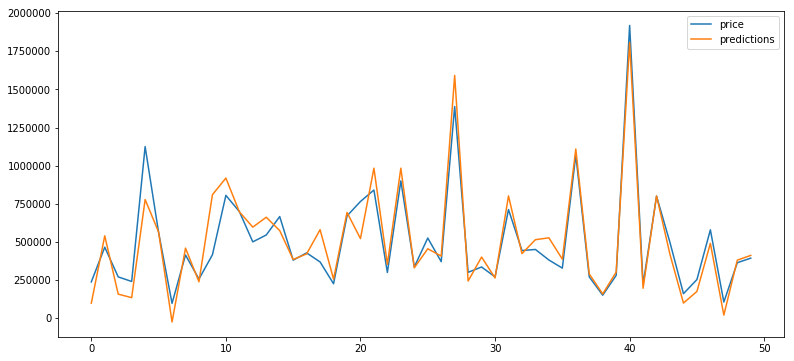

In [34]:
targets.head(50).plot(figsize = (13, 6))

plt.show()